# Project Goals

***i will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data,
i will determine what it takes to be one of the best tennis players in the world***

# about the data

**The ATP men’s tennis dataset includes a wide array of tennis statistics, which are described below:

Identifying Data

Player: name of the tennis player
    
Year: year data was recorded
    
Service Game Columns (Offensive)

Aces: number of serves by the player where the receiver does not touch the ball
    
DoubleFaults: number of times player missed both first and second serve attempts
    
FirstServe: % of first-serve attempts made
    
FirstServePointsWon: % of first-serve attempt points won by the player
    
SecondServePointsWon: % of second-serve attempt points won by the player
    
BreakPointsFaced: number of times where the receiver could have won service game of the player
    
BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
ServiceGamesPlayed: total number of games where the player served
    
ServiceGamesWon: total number of games where the player served and won
    
TotalServicePointsWon: % of points in games where the player served that they won
    
Return Game Columns (Defensive)

FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
    
SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
    
BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
ReturnGamesPlayed: total number of games where the player’s opponent served
    
ReturnGamesWon: total number of games where the player’s opponent served and the player won
    
ReturnPointsWon: total number of points where the player’s opponent served and the player won
    
TotalPointsWon: % of points won by the player

Outcomes

Wins: number of matches won in a year
    
Losses: number of matches lost in a year
    
Winnings: total winnings in USD($) in a year
    
Ranking: ranking at the end of year**

In [1]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#upload the data
df=pd.read_csv('C:/Users/amr/Downloads/code_academy _course/tennis_ace_starting/tennis_stats.csv')

In [3]:
#show the data
df.head(7)

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272
5,Andres Artunedo Martinavarro,2014,0.77,0.67,0.09,0.55,0.40,3,0.50,6,...,0.10,0.26,9,0.67,0.44,0.64,0,1,10434,495
6,Eduardo Struvay,2014,0.76,0.65,0.31,0.36,0.41,1,0.29,6,...,0.20,0.35,9,0.56,0.45,0.58,0,1,24218,1107


# Assessing Data

In [4]:
df.shape

(1721, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
Player                        1721 non-null object
Year                          1721 non-null int64
FirstServe                    1721 non-null float64
FirstServePointsWon           1721 non-null float64
FirstServeReturnPointsWon     1721 non-null float64
SecondServePointsWon          1721 non-null float64
SecondServeReturnPointsWon    1721 non-null float64
Aces                          1721 non-null int64
BreakPointsConverted          1721 non-null float64
BreakPointsFaced              1721 non-null int64
BreakPointsOpportunities      1721 non-null int64
BreakPointsSaved              1721 non-null float64
DoubleFaults                  1721 non-null int64
ReturnGamesPlayed             1721 non-null int64
ReturnGamesWon                1721 non-null float64
ReturnPointsWon               1721 non-null float64
ServiceGamesPlayed            1721 non-null int64
ServiceGamesWon         

In [8]:
df.duplicated().sum()

2

In [9]:
df.isnull().sum()

Player                        0
Year                          0
FirstServe                    0
FirstServePointsWon           0
FirstServeReturnPointsWon     0
SecondServePointsWon          0
SecondServeReturnPointsWon    0
Aces                          0
BreakPointsConverted          0
BreakPointsFaced              0
BreakPointsOpportunities      0
BreakPointsSaved              0
DoubleFaults                  0
ReturnGamesPlayed             0
ReturnGamesWon                0
ReturnPointsWon               0
ServiceGamesPlayed            0
ServiceGamesWon               0
TotalPointsWon                0
TotalServicePointsWon         0
Wins                          0
Losses                        0
Winnings                      0
Ranking                       0
dtype: int64

In [10]:
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


# exploratory analysis

**Aces && Wins**

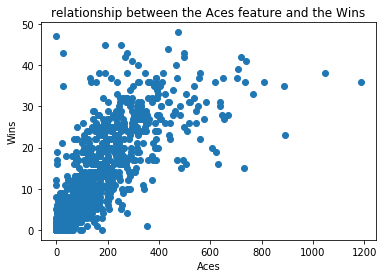

In [16]:
#Aces && Wins
plt.scatter(df['Aces'],df['Wins'])
plt.xlabel('Aces')
plt.ylabel('Wins')
plt.title('relationship between the Aces feature and the Wins')
plt.show()

**BreakPointsOpportunities && Winnings**

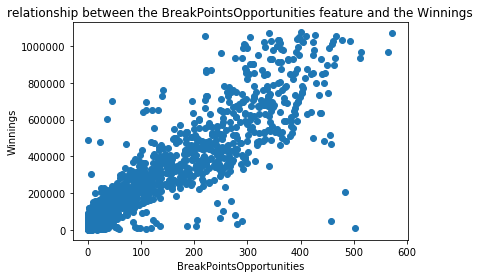

In [17]:
plt.scatter(df['BreakPointsOpportunities'],df['Winnings'])
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings')
plt.title('relationship between the BreakPointsOpportunities feature and the Winnings')
plt.show()

**ServiceGamesWon && Winnings**

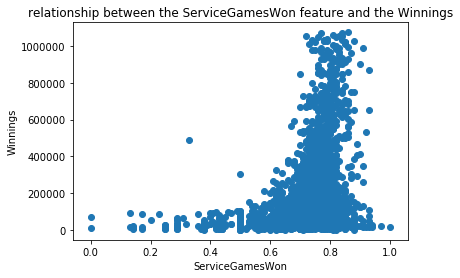

In [18]:
plt.scatter(df['ServiceGamesWon'],df['Winnings'])
plt.xlabel('ServiceGamesWon')
plt.ylabel('Winnings')
plt.title('relationship between the ServiceGamesWon feature and the Winnings')
plt.show()

# build a single feature linear regression model on the data.

**i used 'FirstServeReturnPointsWon' as our feature and Winnings as our outcome.**

In [28]:
#split the data
features=df[['FirstServeReturnPointsWon']]
outcomes=df[['Winnings']]

In [29]:
#split the data into training and testing
features_train,features_test,outcomes_train,outcomes_test=train_test_split(features,outcomes,train_size=0.8,test_size=0.2)

In [30]:
#created a linear regression model 
mlr=LinearRegression()
mlr.fit(features_train,outcomes_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

** predicted outcome based on our model**

In [31]:
outcome_predict=mlr.predict(features_test)

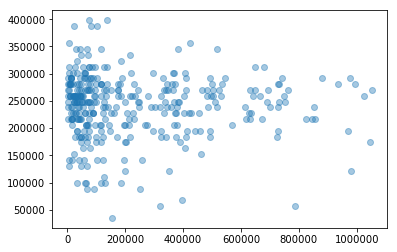

In [32]:
plt.scatter(outcome_test,outcome_predict,alpha=0.4)
plt.show()

# Create a  linear regression models that use multiple features to predict yearly earnings.

In [33]:
two_feature=df[['BreakPointsOpportunities','FirstServeReturnPointsWon']]
new_outcom=df[['Winnings']]

In [34]:
two_feature_train,two_feature_test,new_outcom_train,new_outcom_test=train_test_split(two_feature,new_outcom,train_size=0.8)

In [35]:
model=LinearRegression()
model.fit(two_feature_train,new_outcom_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
new_outcom_predict=model.predict(two_feature_test)

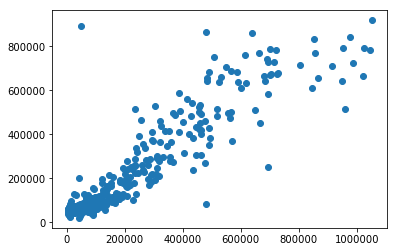

In [37]:
plt.scatter(new_outcom_test,new_outcom_predict)
plt.show()

# Create a  linear regression models that use multiple features to predict yearly earnings

In [39]:
multi_features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
newest_outcome = df[['Winnings']]

In [40]:
multi_features_train,multi_features_test,newest_outcome_train,newest_outcome_test=train_test_split(multi_features,newest_outcome,train_size=0.8)

In [41]:
model_3=LinearRegression()
model_3.fit(multi_features_train,newest_outcome_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
newest_outcome_predict=model_3.predict(multi_features_test)

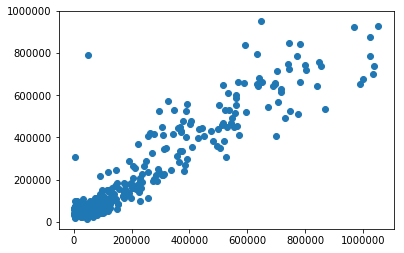

In [43]:
plt.scatter(newest_outcome_test,newest_outcome_predict)
plt.show()